##### Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 1. Introduction
The purpose of this report is to analyze the house rental market in Abu Dhabi, focusing on rental prices, property characteristics, and trends across neighborhoods.


##### Loading Data

In [16]:
db = pd.read_csv('rentals_3bedr_Abu_Dhabi_2.csv')

### 2. General Analysis
This section provides an overview of the dataset, including basic statistics about rental properties and their distribution.


### 3. Descriptive Statistics - Rental Prices & Property Characteristics
Statistical measures such as mean, median, and standard deviation for rental prices, sizes.


In [17]:
print(db.head(), "\n")
print(db.info(), "\n")
print("Number of rows: ", len(db), "\n")
print("Maximum Price: ", db['Price'].max(), "\nMinimum Price: ", db['Price'].min(), "\n")

    Price  Nr Bedrooms  Nr Bathrooms                   Location  Size  \
0  130000            3             5   Al Khalidiyah, Abu Dhabi  2500   
1   60000            3             3   Al Khalidiyah, Abu Dhabi  1800   
2   80400            3             3   Al Khalidiyah, Abu Dhabi  1900   
3   78000            3             3   Al Khalidiyah, Abu Dhabi  2000   
4   60000            3             3   Al Khalidiyah, Abu Dhabi  1600   

  Unnamed: 5       City  
0       sqft  Abu Dhabi  
1       sqft  Abu Dhabi  
2       sqft  Abu Dhabi  
3       sqft  Abu Dhabi  
4       sqft  Abu Dhabi   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         322 non-null    int64  
 1   Nr Bedrooms   322 non-null    int64  
 2   Nr Bathrooms  321 non-null    float64
 3   Location      322 non-null    object 
 4   Size          322 non-null    int64 

In [18]:
pd.options.display.float_format = '{:.0f}'.format
db.describe()

,Price,Nr Bedrooms,Nr Bathrooms,Size
count,322,322,321,322
mean,126206,3,4,2296
std,94701,0,1,2755
min,50000,3,2,451
25%,80000,3,3,1750
50%,105000,3,4,2000
75%,145000,3,4,2400
max,1400000,3,6,50000


### Plotting

counts stores the count for each bar

patches stores the rectangle of each bar

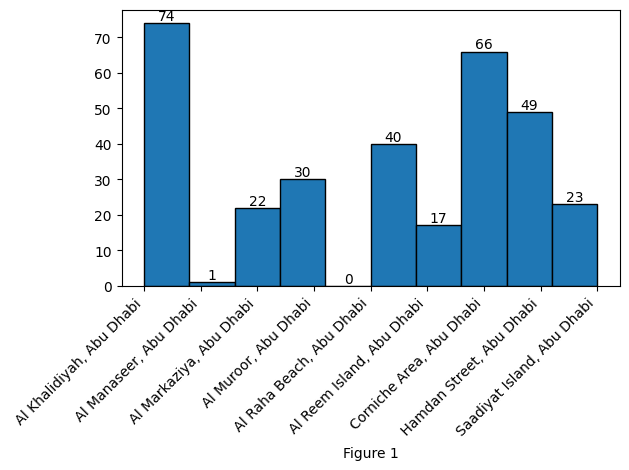

In [57]:
counts, bins, patches = plt.hist(db['Location'], bins=10, edgecolor='black')
plt.xticks(rotation=45, ha='right')

for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2, 
             counts[i],
             int(counts[i]),
             ha='center',
             va='bottom')

plt.xlabel('Figure 1')
plt.tight_layout()

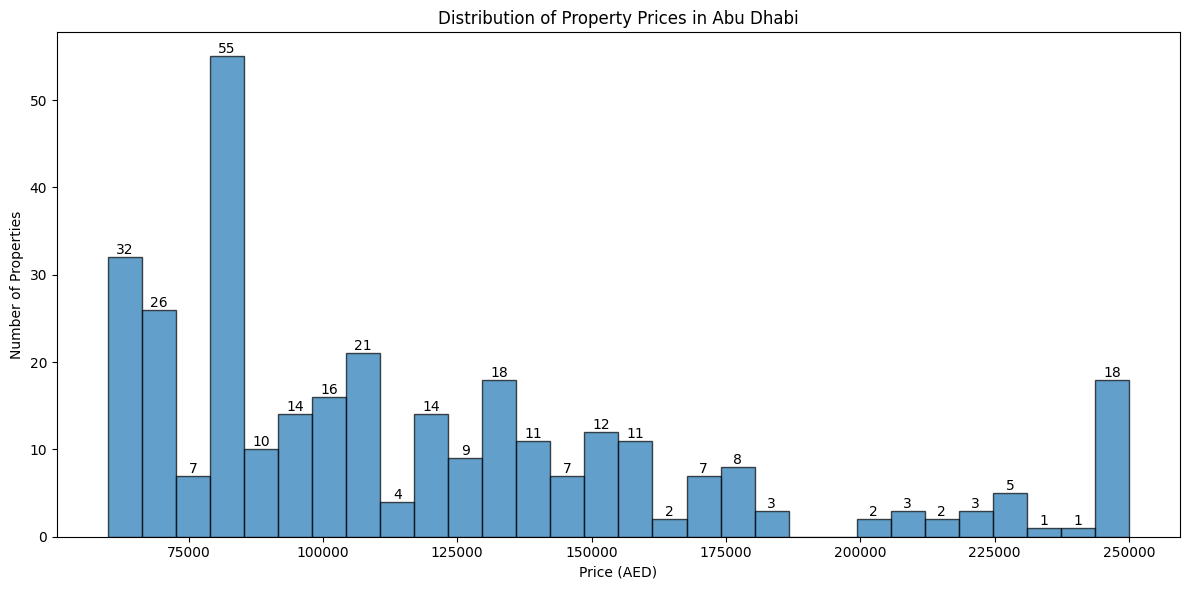

In [58]:
plt.figure(figsize=(12, 6))

counts, bins, patches = plt.hist(db['Price'], bins=30, edgecolor='black', alpha=0.7)

for i in range(len(patches)):
    if counts[i] > 0:
        plt.text(patches[i].get_x() + patches[i].get_width()/2,
                 counts[i],
             int(counts[i]),
             ha='center',
             va='bottom')

plt.xlabel('Price (AED)')
plt.ylabel('Number of Properties') 
plt.title('Distribution of Property Prices in Abu Dhabi')

plt.tight_layout()
plt.show()


### 6. Box Plots
#### Rental Prices by Neighborhood
Visual representation of rental price ranges in each neighborhood.

#### Rental Prices by Property Type
Box plots to compare rental prices for different property types.


Location Statistics:
                           Price                             
                           count   mean   std     min     max
Location                                                     
 Al Khalidiyah, Abu Dhabi     74 101316 31007   60000  180000
 Al Manaseer, Abu Dhabi        1  85000   NaN   85000   85000
 Al Markaziya, Abu Dhabi      22 123600 50992   72500  250000
 Al Muroor, Abu Dhabi         30  80100 19031   60000  125000
 Al Raha Beach, Abu Dhabi     40 152641 45984   80000  250000
 Al Reem Island, Abu Dhabi    17 132000 38087   85000  250000
 Corniche Area, Abu Dhabi     66 121167 38850   60000  220000
 Hamdan Street, Abu Dhabi     49  81633 18798   60000  150000
Saadiyat Island, Abu Dhabi    23 235000 25045  150000  250000


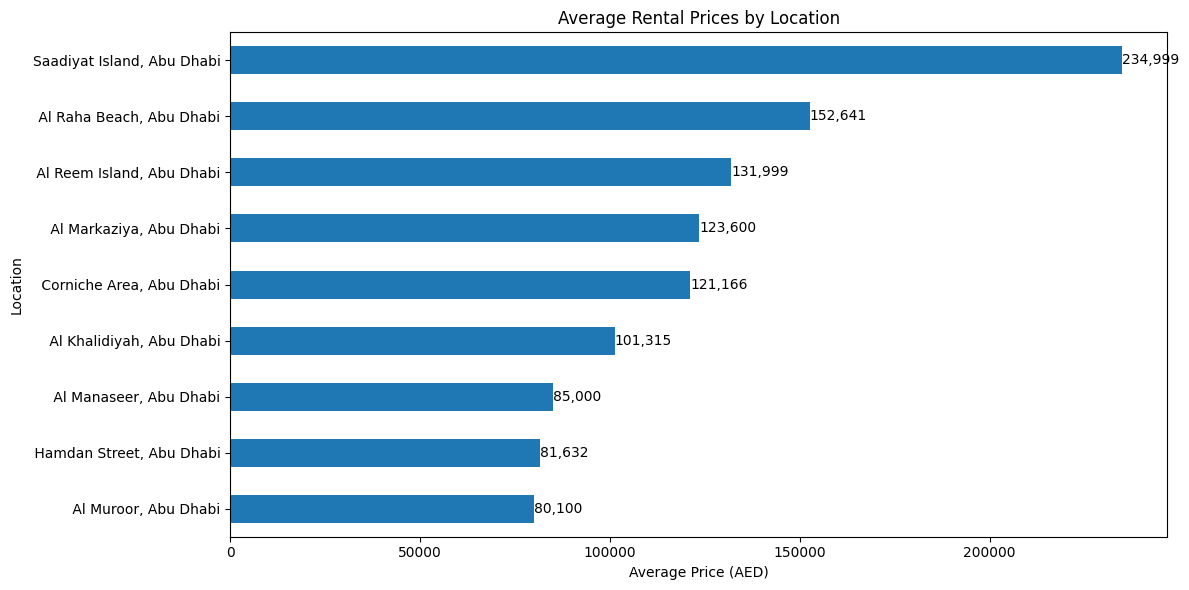

In [59]:
plt.figure(figsize=(12, 6))

location_prices = db.groupby('Location')['Price'].mean().sort_values(ascending=True)

location_prices.plot(kind='barh')
plt.title('Average Rental Prices by Location')
plt.xlabel('Average Price (AED)')
plt.ylabel('Location')

for i, v in enumerate(location_prices):
    plt.text(v, i, f'{int(v):,}', va='center')

location_stats = db.groupby('Location').agg({
    'Price': ['count', 'mean', 'std', 'min', 'max']
}).round(2)
print("\nLocation Statistics:")
print(location_stats)

plt.tight_layout()
plt.show()

The white dots represent individual properties with rental prices that are unusually high or low compared to other properties in the same location.

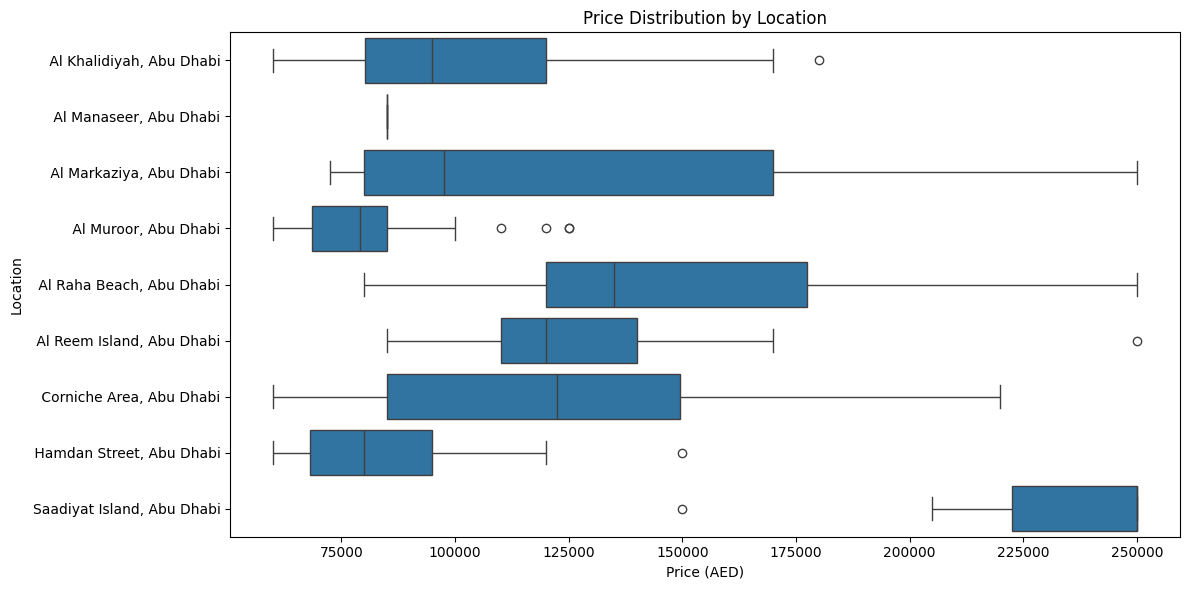

In [60]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Price', y='Location', data=db)
plt.title('Price Distribution by Location')
plt.xlabel('Price (AED)')
plt.ylabel('Location')

plt.tight_layout()
plt.show()

### 7. Q-Q Plots
#### Rental Price Distribution
Assessing the normality of rental price distribution using Q-Q plots.

#### Property Size & Rental Prices
Analyzing the relationship between property size and rental prices.


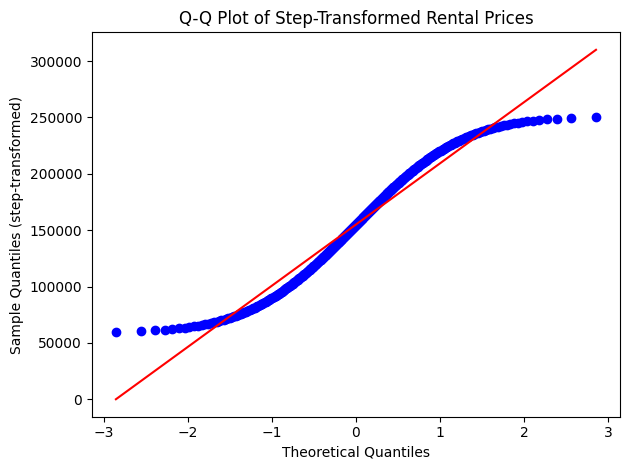

In [64]:
stats.probplot(np.linspace(min(db['Price']), max(db['Price']), len(db['Price'])), dist="norm", plot=plt)
plt.title('Q-Q Plot of Step-Transformed Rental Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles (step-transformed)')
plt.tight_layout()
plt.show()

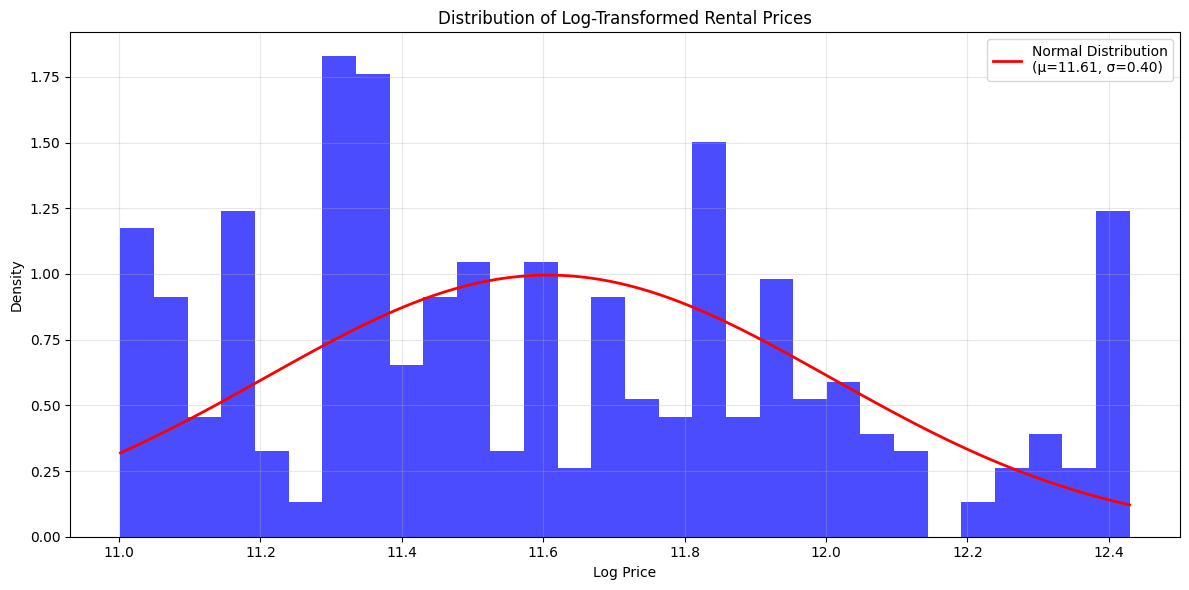

Skewness: 0.4232123693104419
Kurtosis: -0.7335993391475726
Normality test p-value: 1.4873817092216278e-06


In [65]:
plt.figure(figsize=(12, 6))

log_prices = np.log(db['Price'])
counts, bins, _ = plt.hist(log_prices, bins=30, density=True, alpha=0.7, color='blue')

mu = np.mean(log_prices)
sigma = np.std(log_prices)

x = np.linspace(min(bins), max(bins), 100)
gaussian = stats.norm.pdf(x, mu, sigma)

plt.plot(x, gaussian, 'r-', lw=2, label=f'Normal Distribution\n(μ={mu:.2f}, σ={sigma:.2f})')

plt.title('Distribution of Log-Transformed Rental Prices')
plt.xlabel('Log Price')
plt.ylabel('Density')
plt.legend()

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Skewness:", stats.skew(log_prices))
print("Kurtosis:", stats.kurtosis(log_prices))
_, p_value = stats.normaltest(log_prices)
print("Normality test p-value:", p_value)

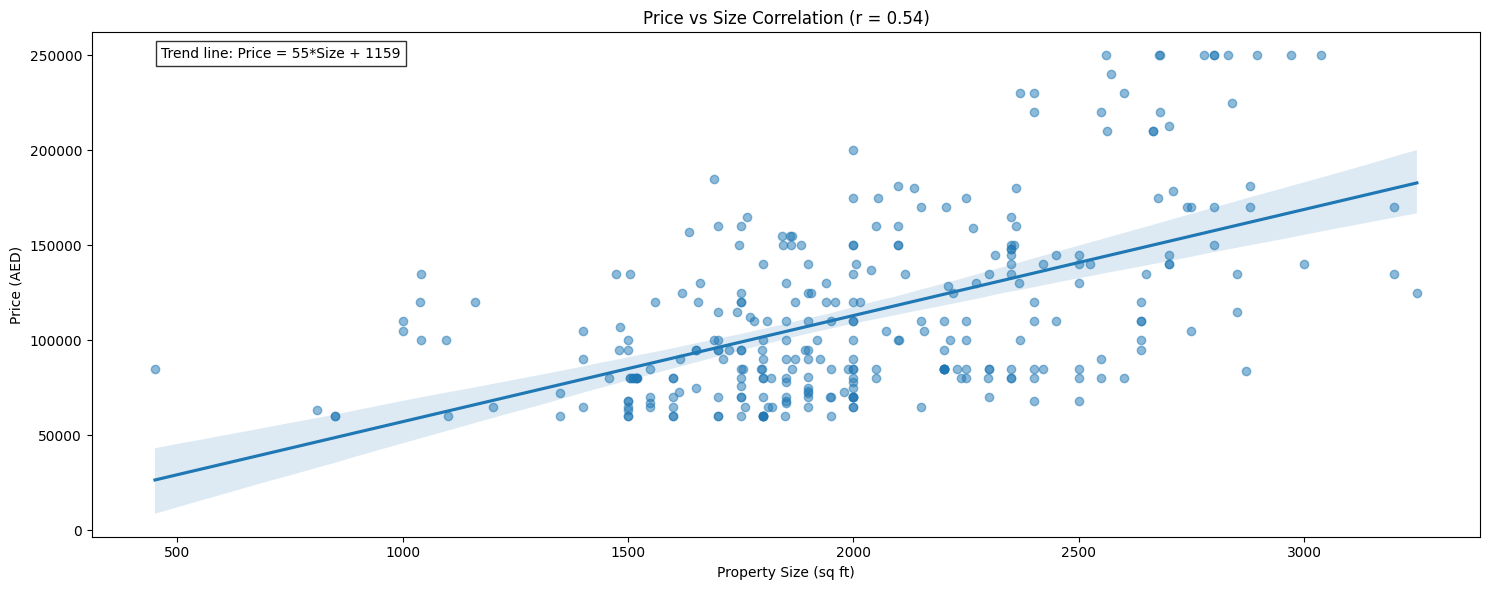

Number of properties removed as outliers: 21


In [33]:
# Create figure
plt.figure(figsize=(15, 6))

# Remove outliers (optional)
Q1 = db['Size'].quantile(0.25)
Q3 = db['Size'].quantile(0.75)
IQR = Q3 - Q1
size_outlier_cutoff = Q3 + 1.5 * IQR
db_filtered = db[db['Size'] <= size_outlier_cutoff]

# Calculate correlation coefficient for filtered data
correlation = db_filtered['Size'].corr(db_filtered['Price'])

# Create scatter plot with regression line
sns.regplot(x='Size', y='Price', data=db_filtered, scatter_kws={'alpha':0.5})
plt.title(f'Price vs Size Correlation (r = {correlation:.2f})')
plt.xlabel('Property Size (sq ft)')
plt.ylabel('Price (AED)')

# Add trend statistics
z = np.polyfit(db_filtered['Size'], db_filtered['Price'], 1)
trend_text = f'Trend line: Price = {int(z[0])}*Size + {int(z[1])}'
plt.text(0.05, 0.95, trend_text, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary of removed outliers (optional)
print(f"Number of properties removed as outliers: {len(db) - len(db_filtered)}")

### 8. Price Distribution Analysis
#### Rental Prices across Categories (Apartments, Villas, etc.)
Analyzing price ranges for various property types.

#### Price Trends by Bedrooms & Size
Examining trends in rental prices based on the number of bedrooms and property size.

### <span style="color: red">NOT POSSIBLE WITH GIVEN DATA</span>

### 9. Confidence Intervals
Calculating confidence intervals for average rental prices across different neighborhoods and property types.


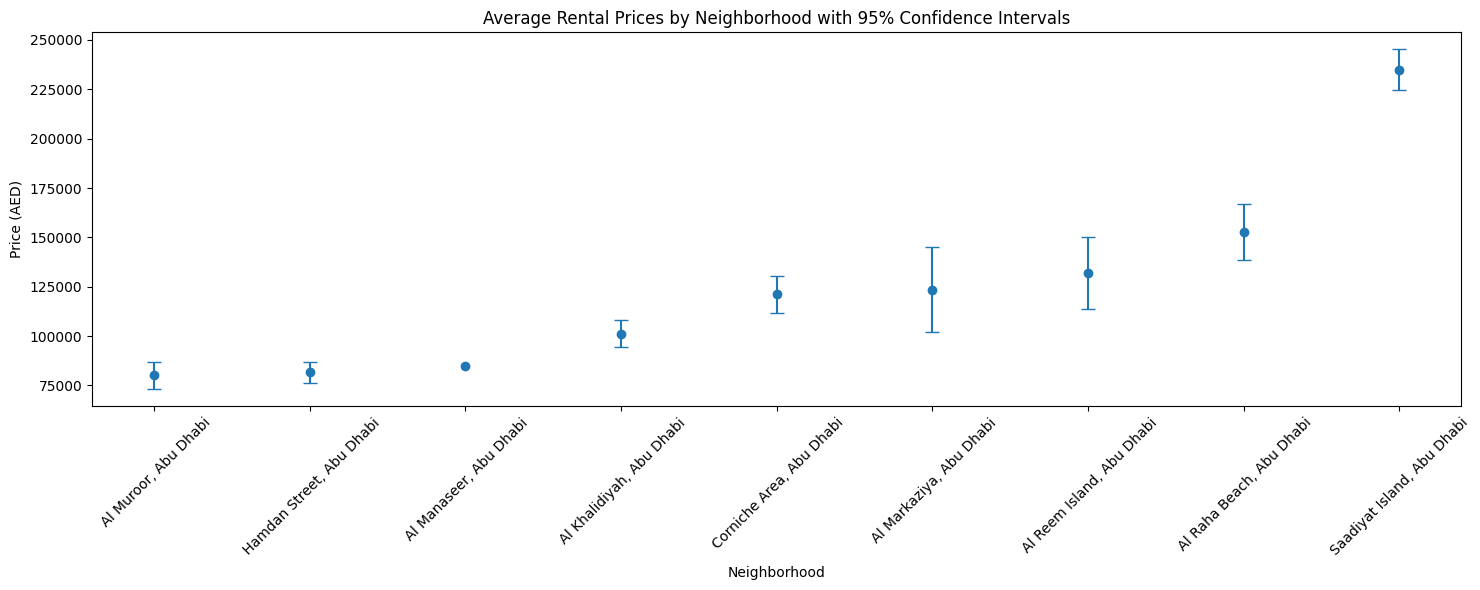

In [56]:
neighborhood_stats = db.groupby('Location')['Price'].agg(['mean', 'count', 'std']).reset_index()
neighborhood_stats['ci'] = 1.96 * neighborhood_stats['std'] / np.sqrt(neighborhood_stats['count'])
neighborhood_stats['ci_lower'] = neighborhood_stats['mean'] - neighborhood_stats['ci'] 
neighborhood_stats['ci_upper'] = neighborhood_stats['mean'] + neighborhood_stats['ci']

plt.figure(figsize=(15, 6))

neighborhood_stats = neighborhood_stats.sort_values('mean', ascending=True)
plt.errorbar(neighborhood_stats['Location'], neighborhood_stats['mean'], 
            yerr=neighborhood_stats['ci'], fmt='o', capsize=5)
plt.title('Average Rental Prices by Neighborhood with 95% Confidence Intervals')
plt.xlabel('Neighborhood')
plt.ylabel('Price (AED)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values


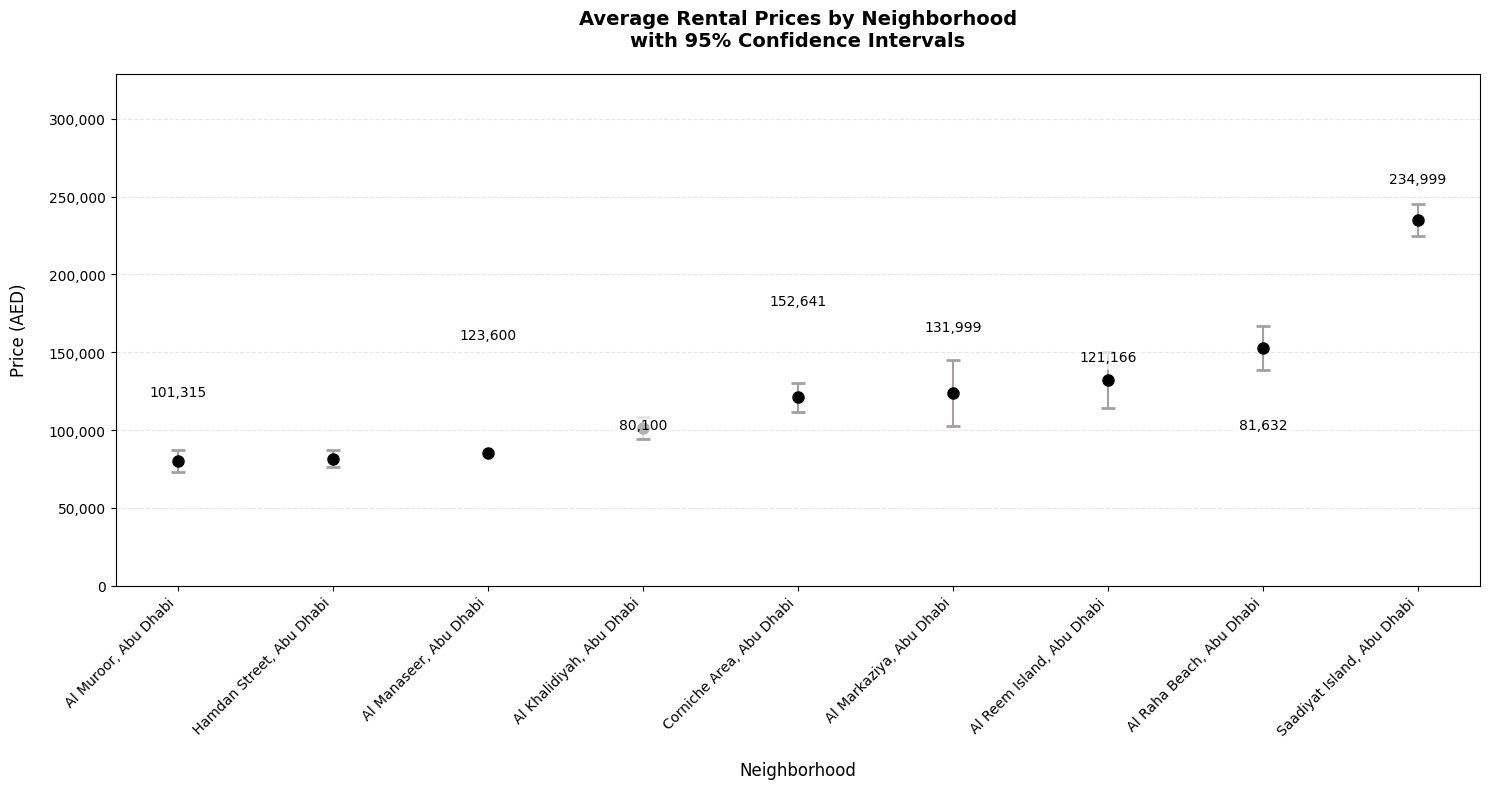

In [55]:
neighborhood_stats = db.groupby('Location')['Price'].agg(['mean', 'count', 'std']).reset_index()
neighborhood_stats['ci'] = 1.96 * neighborhood_stats['std'] / np.sqrt(neighborhood_stats['count'])

neighborhood_stats = neighborhood_stats.sort_values('mean', ascending=True)

plt.figure(figsize=(15, 8))

plt.errorbar(neighborhood_stats['Location'], 
            neighborhood_stats['mean'],
            yerr=neighborhood_stats['ci'],
            fmt='o',
            capsize=5,
            capthick=2,
            markersize=8,
            color='#000000',
            ecolor='#a69f9f')

for i, row in neighborhood_stats.iterrows():
    y_pos = row['mean'] + row['ci'] + (max(neighborhood_stats['mean']) * 0.05)
    
    plt.text(i, y_pos, f'{int(row["mean"]):,}', 
             ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.title('Average Rental Prices by Neighborhood\nwith 95% Confidence Intervals',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood', labelpad=15, fontsize=12)
plt.ylabel('Price (AED)', labelpad=15, fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(8))

plt.gca().set_facecolor('#FFFFFF')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

plt.ylim(0, max(neighborhood_stats['mean']) * 1.4)

plt.tight_layout()

plt.show()